In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_excel(r'data_cts_violent_and_sexual_crime.xlsx')
population = pd.read_csv(r'API_SP.POP.TOTL_DS2_en_csv_v2_1089362.csv', header=None, skiprows=4)


In [67]:
# converting axis 0 into the column names
df.columns = df.iloc[1]
population.columns = population.iloc[0]

df = df.drop([0,1]) # dropping rows 0 1 

In [68]:
population

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,NaN
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,NaN
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
4,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1777568.0,1791019.0,1797086.0,1788891.0,1790151.0,1786079.0,1768096.0,1682668.0,1527324.0,NaN
263,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,40583164.0,NaN
264,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,64007187.0,NaN
265,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,21314956.0,NaN


In [69]:
# further preprocessing

population_long = pd.melt(population, # converts the format of datset from wide to long
                    id_vars=['Country Name'], # fixed column
                    var_name='Year', 
                    value_name = 'Population')

population_long = population_long.rename(columns={"Country Name": "Country"}) #rename to match df
#convert years to int
#population_long['Year'] = pd.to_datetime(population_long['Year'])
#df['Year'] = pd.to_datetime(df['Year']).astype('Int64')
for frame in (df, population_long):
    frame["Year"] = pd.to_numeric(frame["Year"], errors="coerce").astype("Int64")
#merge df and population
data = df.merge(population_long, how='left', on=['Country', 'Year'])

print(data.head())


  Iso3_code     Country  Region       Subregion         Indicator  \
0       AZE  Azerbaijan    Asia    Western Asia  Violent offences   
1       BEL     Belgium  Europe  Western Europe  Violent offences   
2       BGR    Bulgaria  Europe  Eastern Europe  Violent offences   
3       BHR     Bahrain    Asia    Western Asia  Violent offences   
4       BLR     Belarus  Europe  Eastern Europe  Violent offences   

            Dimension         Category    Sex    Age  Year  \
0  by type of offence  Serious assault  Total  Total  2003   
1  by type of offence  Serious assault  Total  Total  2003   
2  by type of offence  Serious assault  Total  Total  2003   
3  by type of offence  Serious assault  Total  Total  2003   
4  by type of offence  Serious assault  Total  Total  2003   

  Unit of measurement  VALUE Source  Population  
0              Counts    155    CTS   8234100.0  
1              Counts  61959    CTS  10376133.0  
2              Counts   3806    CTS   7775327.0  
3           

In [ ]:
# create rate per 100k 
data['rate_per_100k'] = (data['VALUE'] / data['Population']) * 100_000
print(data['rate_per_100k'].dropna())

0          1.882416
1        597.129971
2          48.94971
3        353.294956
4          41.15651
            ...    
27865     25.348859
27866      0.010981
27867      0.001561
27868        0.0059
27869      5.587897
Name: rate_per_100k, Length: 23268, dtype: object


In [74]:
#more preprocessing
data = data.pivot_table(index=['Region', 'Year'],
                        columns='Category',
                        values='rate_per_100k',
                        fill_value=0) #category becomes its own colums, better for plotting and aggregating
#merge sexual violence categories
merge_cat = ["Serious assault", "Sexual Exploitation", "Sexual violence",
    "Sexual violence: Other acts of sexual violence",
    "Sexual violence: Rape", "Sexual violence: Sexual assault",]
if any(cat in data.columns for cat in merge_cat):
    data['Violence & Assault'] = data[merge_cat].sum(axis=1)
    data.drop(columns=[c for c in merge_cat if c in data.columns], inplace=True)


In [75]:
data.head()

Category     Acts intended to induce fear or emotional distress  \
Region Year                                                       
Africa 2003                                                0.0    
       2004                                                0.0    
       2005                                                0.0    
       2006                                                0.0    
       2007                                                0.0    

Category     Acts intended to induce fear or emotional distress: Cyber-related  \
Region Year                                                                      
Africa 2003                                                0.0                   
       2004                                                0.0                   
       2005                                                0.0                   
       2006                                                0.0                   
       2007                                                0.0                   

Category     Intimate partner or family member  Kidnapping  \
Region Year                                                  
Africa 2003                                0.0    1.583052   
       2004                                0.0    1.143371   
       2005                                0.0    0.222885   
       2006                                0.0    0.307720   
       2007                                0.0    0.440198   

Category     Other Perpetrator known to the victim  \
Region Year                                          
Africa 2003                                    0.0   
       2004                                    0.0   
       2005                                    0.0   
       2006                                    0.0   
       2007                                    0.0   

Category     Perpetrator unknown to the victim  \
Region Year                                      
Africa 2003                                0.0   
       2004                                0.0   
       2005                                0.0   
       2006                                0.0   
       2007                                0.0   

Category     Relationship to perpetrator is not known  Violence & Assault  
Region Year                                                                
Africa 2003                                       0.0          172.403179  
       2004                                       0.0          158.443952  
       2005                                       0.0           70.310886  
       2006                                       0.0           65.390178  
       2007                                       0.0           74.460722

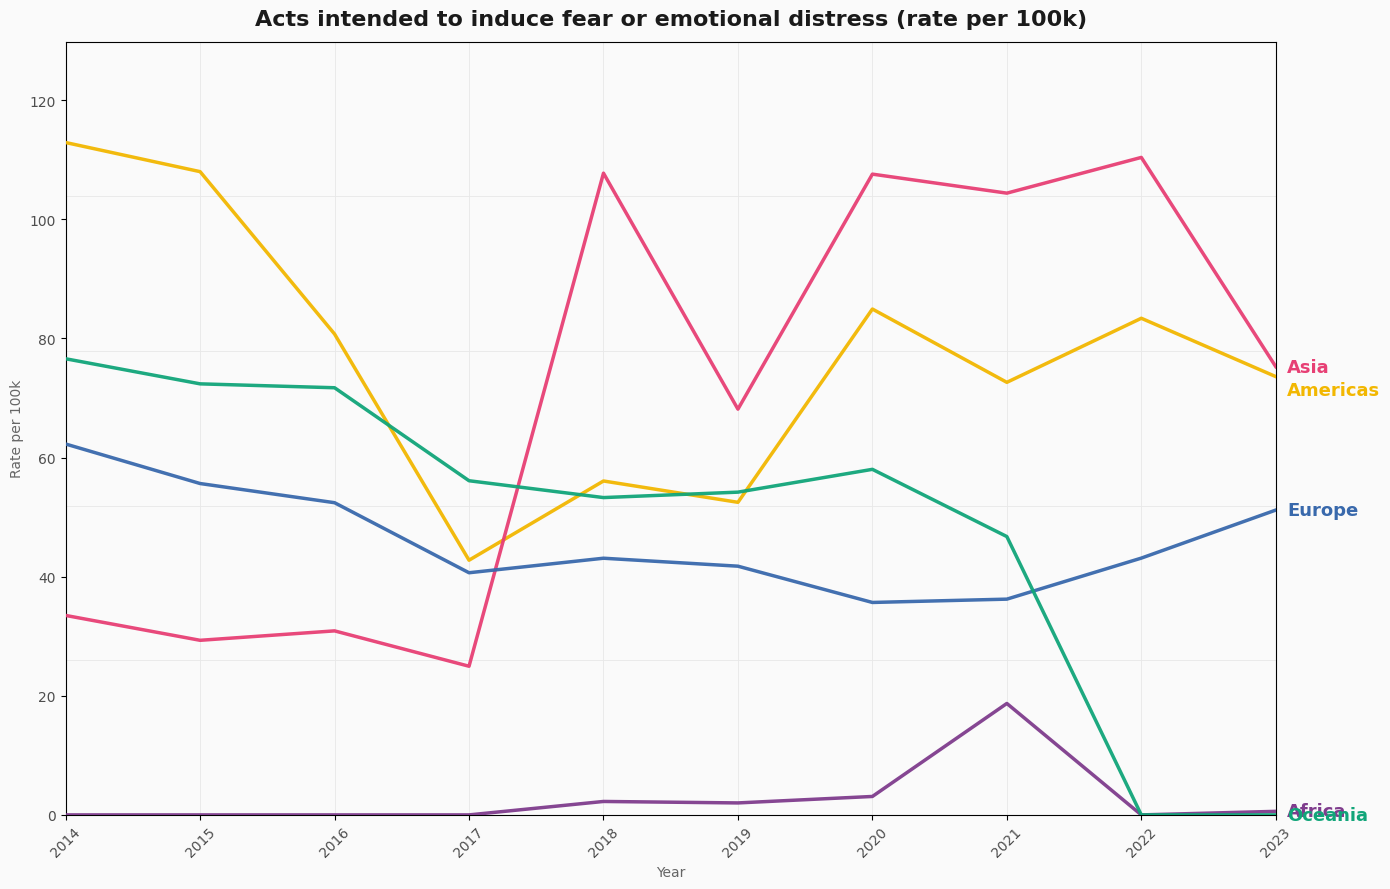

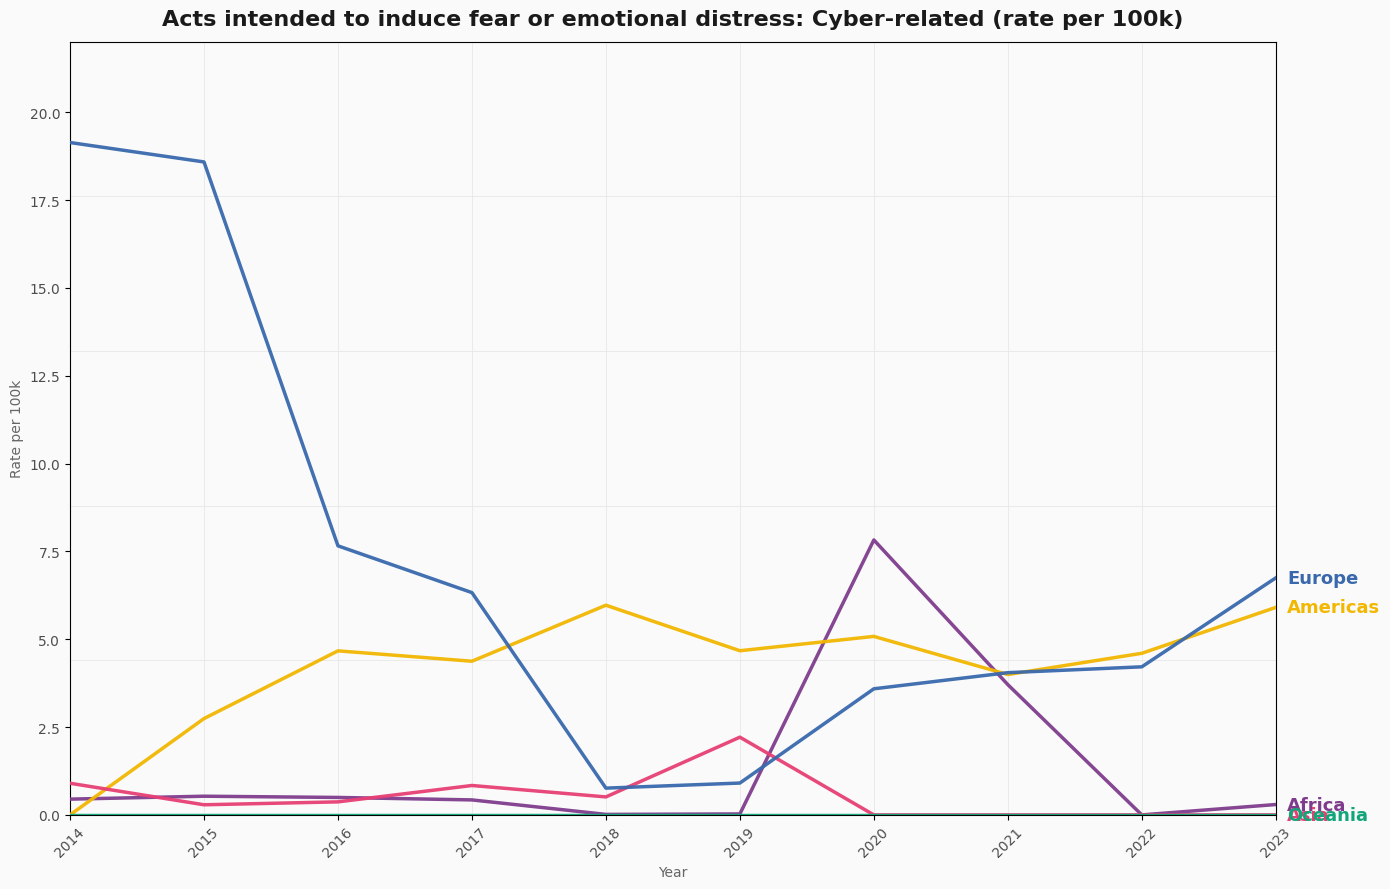

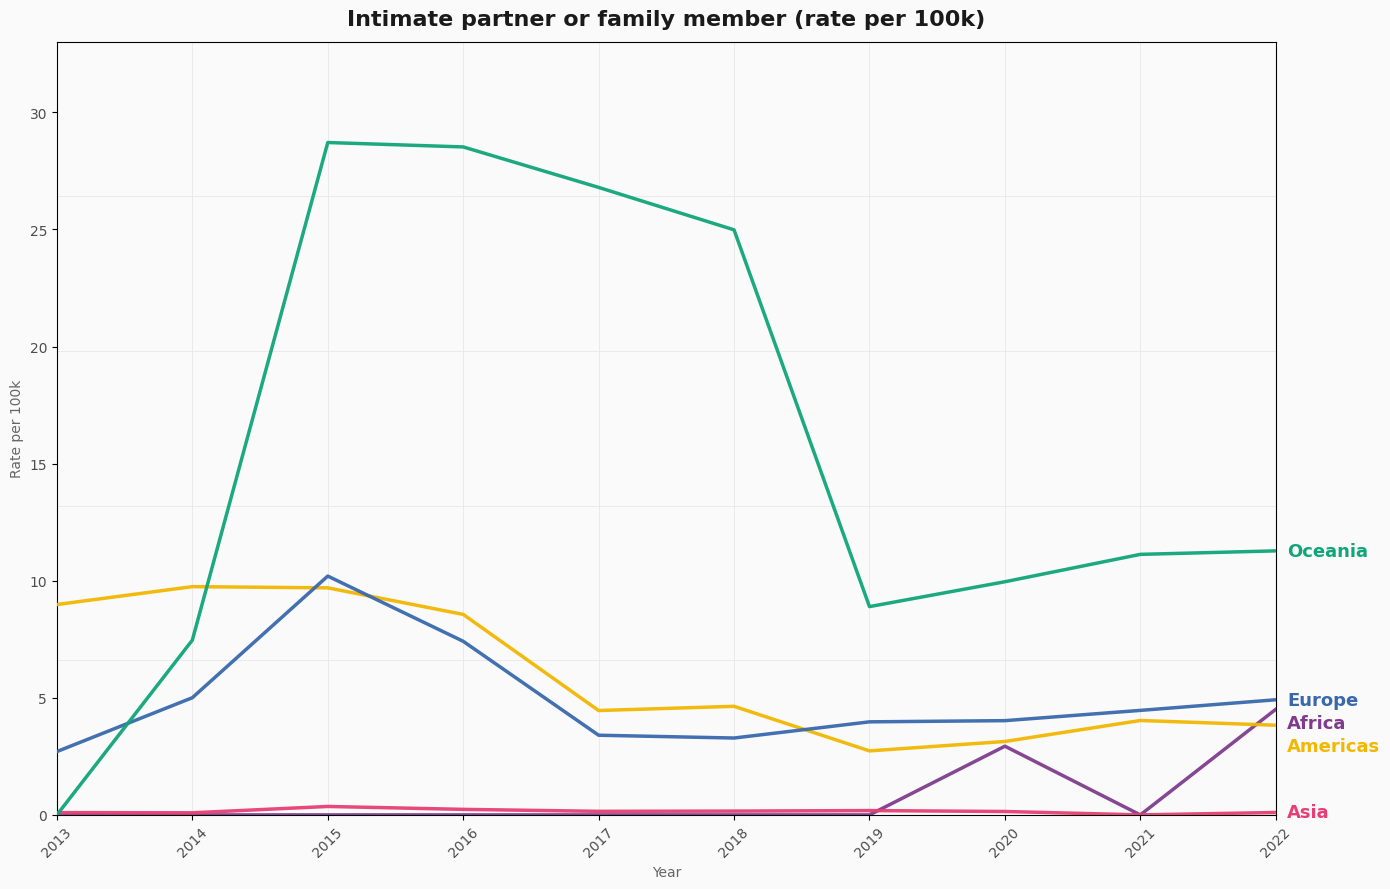

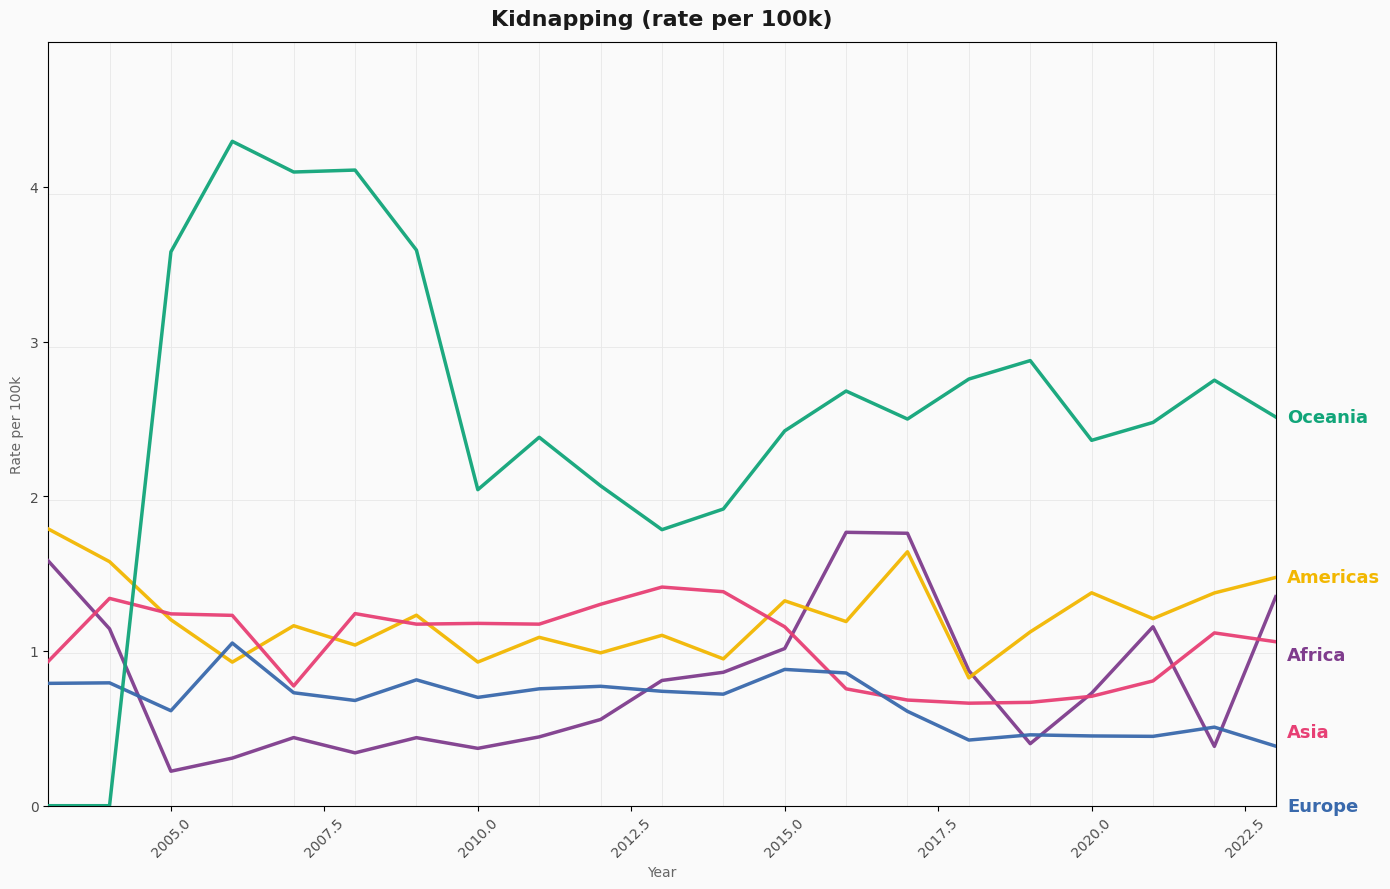

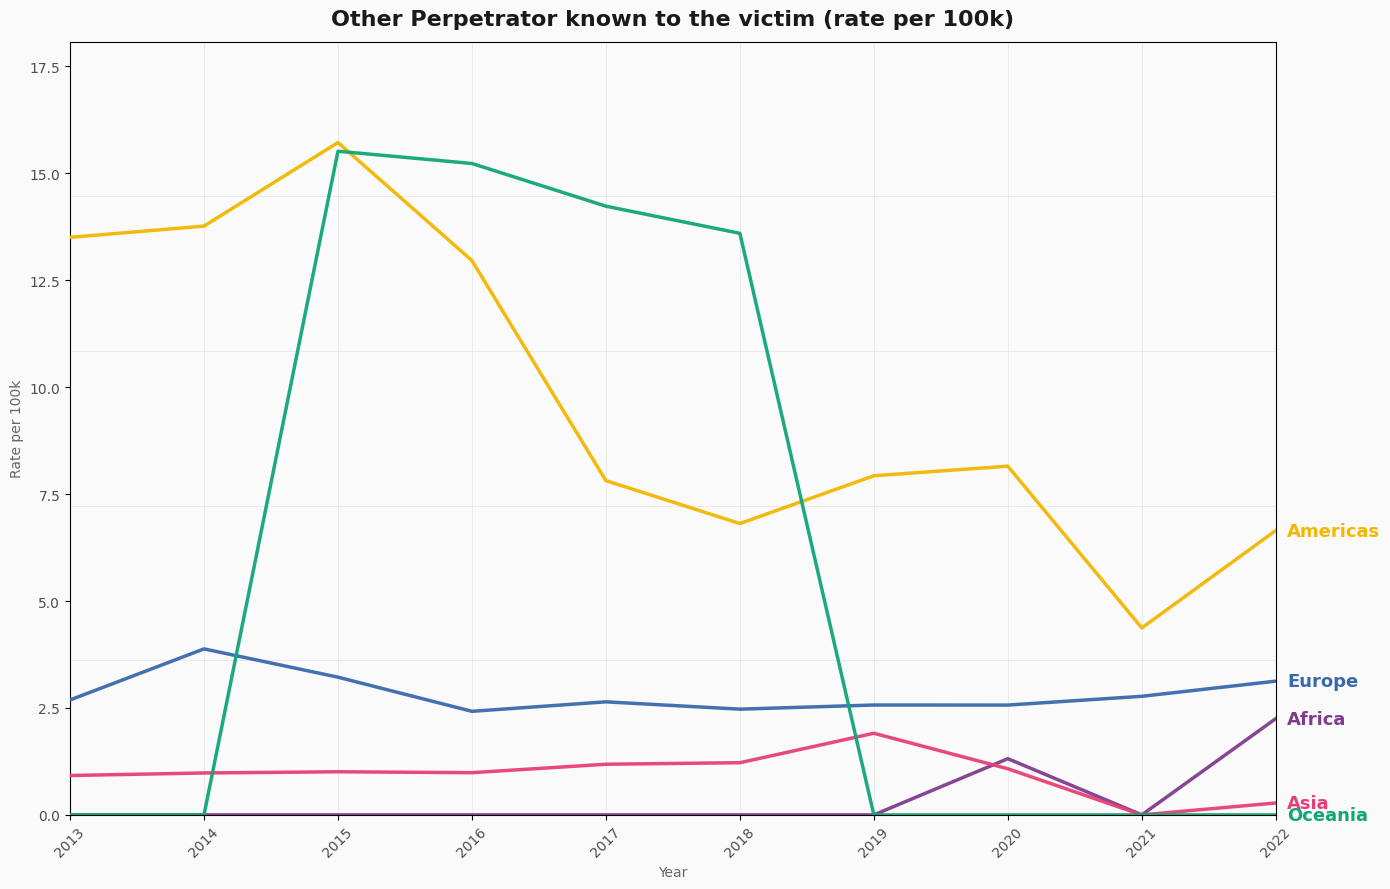

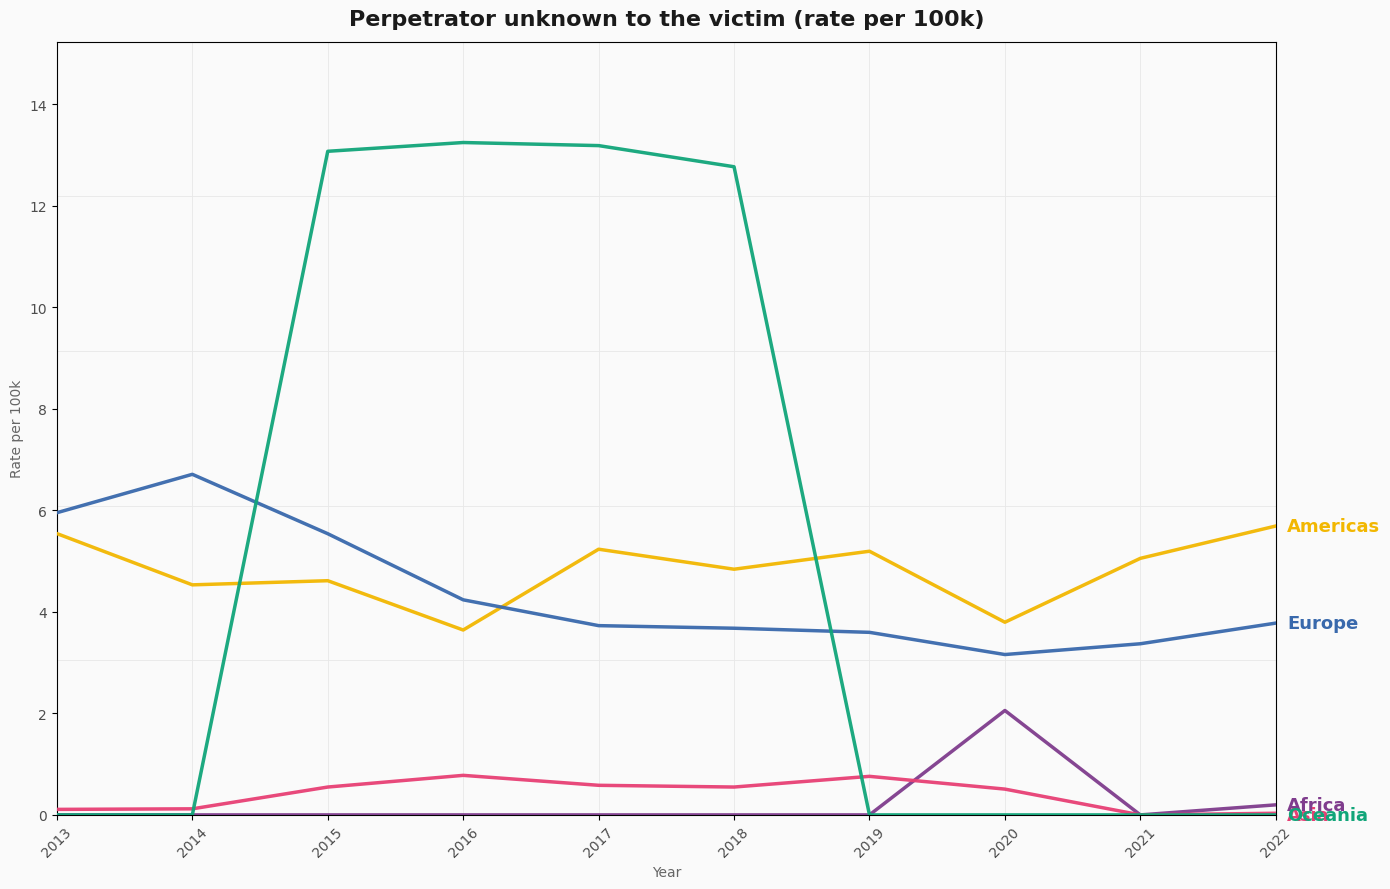

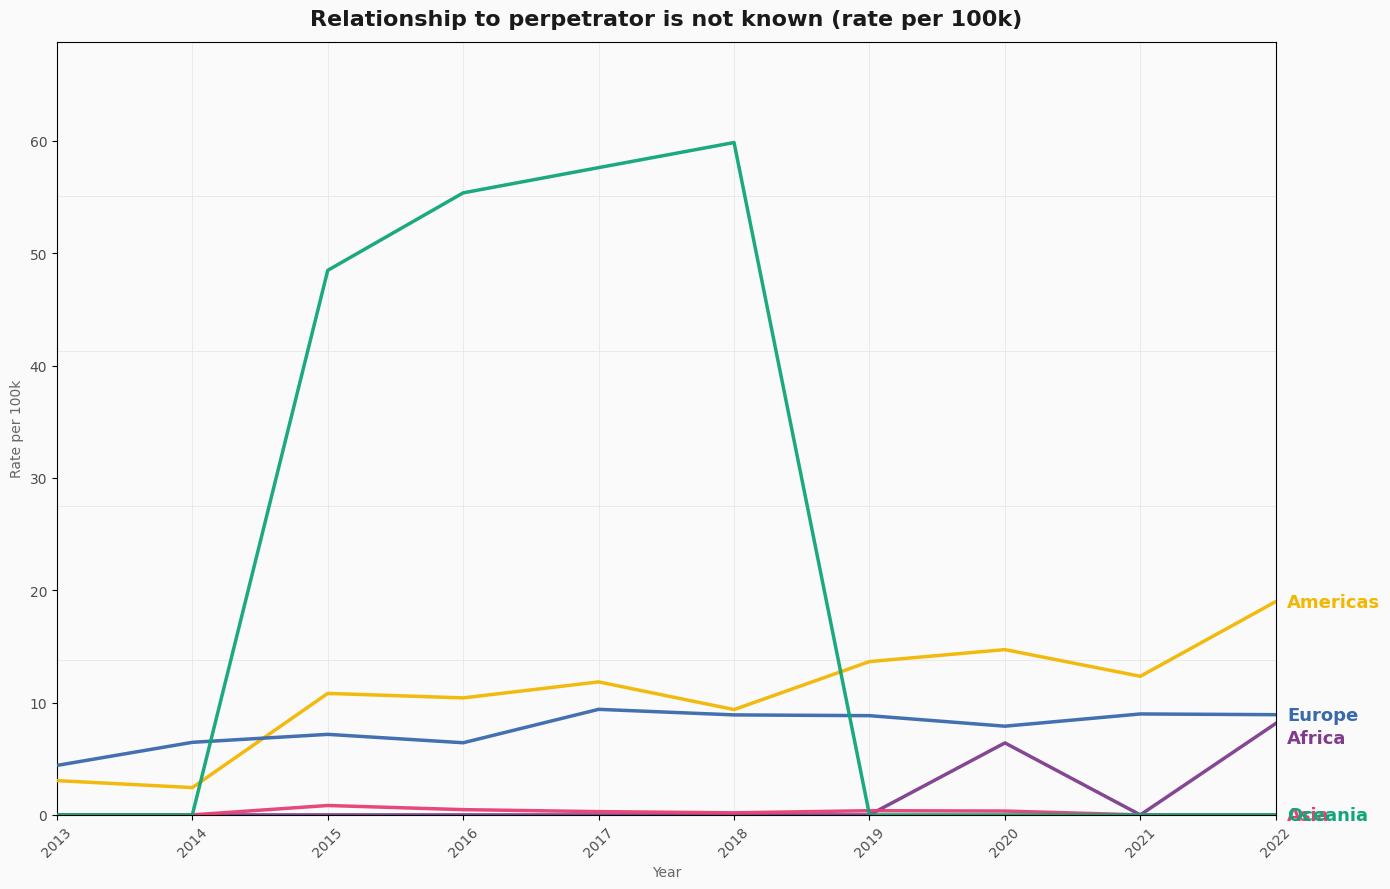

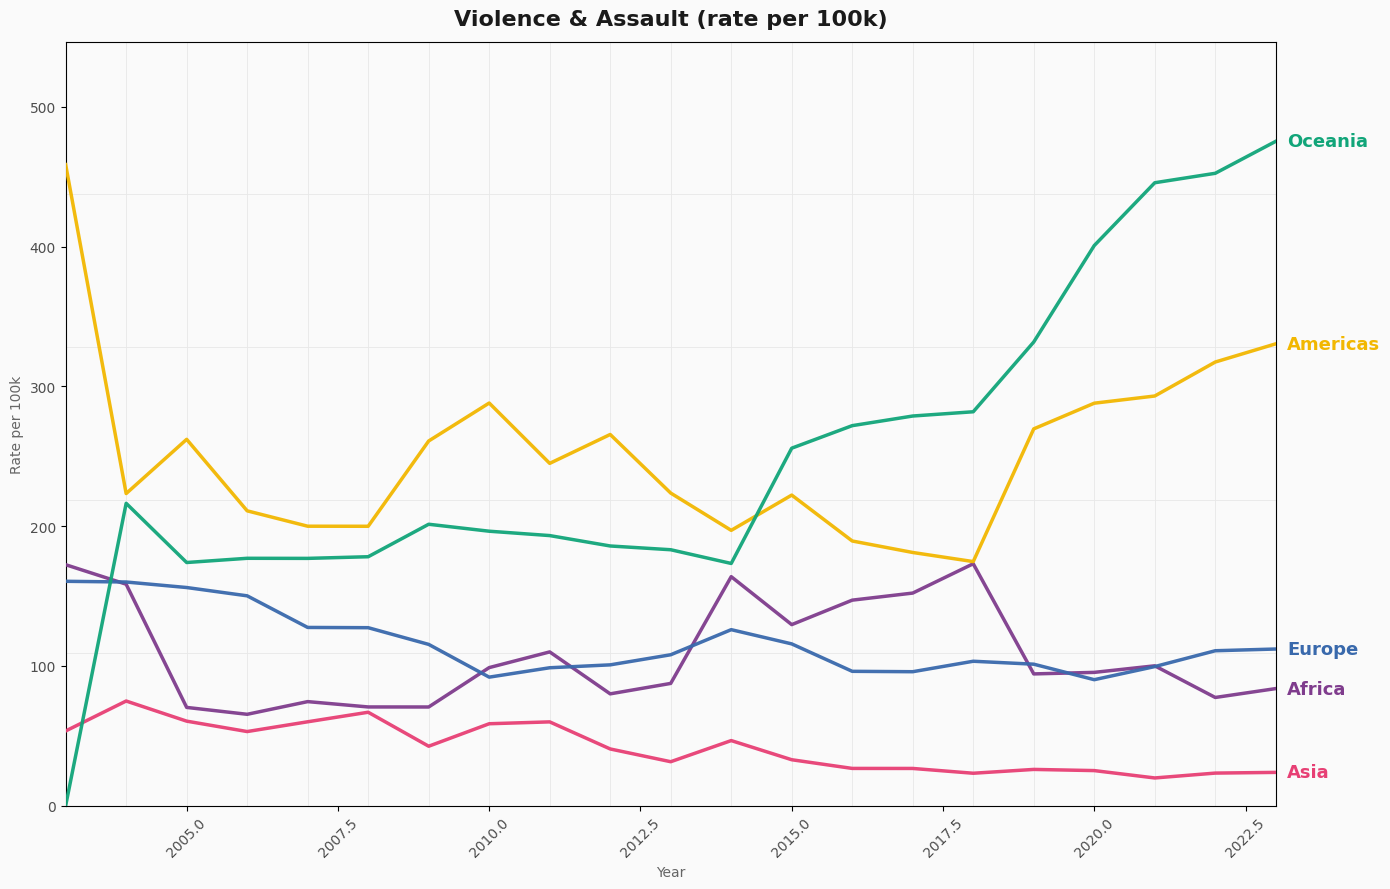

In [85]:
#PLOT
for cat in data.columns:
    cat_df = data[cat].unstack(level=0).sort_index().fillna(0)#unstack makes region into columns for each category
    if cat_df.empty: #skip if empty
        continue 

    nonzero_mask = cat_df.sum(axis=1) > 0
    if not nonzero_mask.any():
        continue
    cat_df = cat_df.loc[nonzero_mask] #finds the first year with data on it
    years = cat_df.index.astype(int)
    x_min , x_max = years.min(), years.max() #x-axis

    y_max = float(cat_df.to_numpy().max())
    if y_max <= 0:
        #force a small positive axis if value is 0
        y_lim = 1.0
    else:
        #15% margin above
        y_lim = max(y_max * 1.15, 1.0)
    #fig
    fig,ax = plt.subplots(figsize=(14,9))
    plt.subplots_adjust(right = 0.8)
    #grid colors
    GREY10 = "#1a1a1a"
    GREY30 = "#4d4d4d"
    GREY40 = "#666666"
    GREY75 = "#bfbfbf"
    GREY91 = "#e8e8e8"
    GREY98 = "#fafafa"
    #regions colors
    COLOR_SCALE = {
        "Africa":   "#7F3C8D",
        "Oceania":  "#11A579",
        "Europe":   "#3969AC",
        "Americas": "#F2B701",
        "Asia":     "#E73F74",
    }
    #grid lines
    VLINES = np.arange(2003, 2023, 1)
    fig.patch.set_facecolor(GREY98)
    ax.set_facecolor(GREY98)

    #grid
    for h in VLINES:
        if x_min <= h <=x_max:
            ax.axvline(h, color=GREY91, lw=0.6, zorder=0)
    for y in np.linspace(0, y_lim, 6):
        ax.hlines(y=y, xmin=x_min, xmax=x_max, color=GREY91, lw=0.6, zorder=0)
    
    #lines per region
    for i, region in enumerate(cat_df.columns):
        color = COLOR_SCALE.get(region)
        ax.plot(years, cat_df[region].values,
                linewidth=2.5, alpha=0.95, zorder=3, color=color)    
        
    #end labels outside
    end_vals = cat_df.loc[x_max]
    order = end_vals.sort_values(ascending=False)
    min_gap = max(0.03 * y_lim, 0.5)
    label_pos, current = {}, None
    for region, y in order.items():
        y_lab = y if current is None else min(y, current - min_gap)
        y_lab = max(y_lab, 0)
        label_pos[region] = y_lab
        current = y_lab

    for i, region in enumerate(cat_df.columns):
        color = COLOR_SCALE.get(region)
        ax.annotate(
            region,
            xy=(1.0, label_pos[region]), xycoords=('axes fraction', 'data'),
            xytext=(8, 0), textcoords='offset points',
            ha='left', va='center', color=color, fontsize=13, fontweight='bold',
            clip_on=False
        )

    ax.set_title(f'{cat} (rate per 100k)',
                 fontsize=16, weight='bold', color=GREY10, pad=12)
    ax.set_xlabel('Year', color=GREY40)
    ax.set_ylabel('Rate per 100k', color=GREY40)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_lim)
    ax.tick_params(axis='x', rotation=45, labelcolor=GREY30)
    ax.tick_params(axis='y', labelcolor=GREY30)

    plt.tight_layout()
    plt.show()
